# Capstone Project
## Image classifier for the SVHN dataset
### Instructions

In this notebook, you will create a neural network that classifies real-world images digits. You will use concepts from throughout this course in building, training, testing, validating and saving your Tensorflow classifier model.

This project is peer-assessed. Within this notebook you will find instructions in each section for how to complete the project. Pay close attention to the instructions as the peer review will be carried out according to a grading rubric that checks key parts of the project instructions. Feel free to add extra cells into the notebook as required.

### How to submit

When you have completed the Capstone project notebook, you will submit a pdf of the notebook for peer review. First ensure that the notebook has been fully executed from beginning to end, and all of the cell outputs are visible. This is important, as the grading rubric depends on the reviewer being able to view the outputs of your notebook. Save the notebook as a pdf (you could download the notebook with File -> Download .ipynb, open the notebook locally, and then File -> Download as -> PDF via LaTeX), and then submit this pdf for review.

### Let's get started!

We'll start by running some imports, and loading the dataset. For this project you are free to make further imports throughout the notebook as you wish. 

In [216]:
import tensorflow as tf
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

For the capstone project, you will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images.

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

The train and test datasets required for this project can be downloaded from [here](http://ufldl.stanford.edu/housenumbers/train.tar.gz) and [here](http://ufldl.stanford.edu/housenumbers/test.tar.gz). Once unzipped, you will have two files: `train_32x32.mat` and `test_32x32.mat`. You should store these files in Drive for use in this Colab notebook.

Your goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [217]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [218]:
# Load the dataset from your Drive folder



train = loadmat('/content/gdrive/My Drive/Colab Notebooks/Getting Started with Tensorflow 2/train_32x32.mat')
test = loadmat('/content/gdrive/My Drive/Colab Notebooks/Getting Started with Tensorflow 2/test_32x32.mat')

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

In [219]:
# Loading train and test data and printing their shape

x_train = train['X']
y_train = train['y']

x_test = test['X']
y_test = test['y']

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(32, 32, 3, 73257)
(73257, 1)
(32, 32, 3, 26032)
(26032, 1)


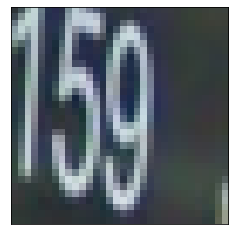

image label is [9]


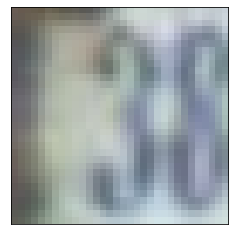

image label is [3]


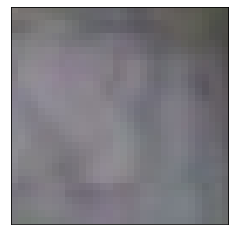

image label is [3]


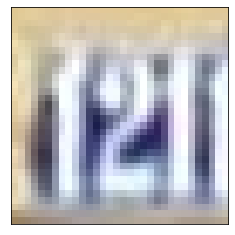

image label is [2]


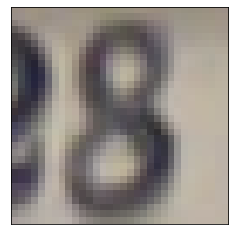

image label is [8]


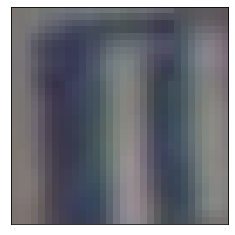

image label is [1]


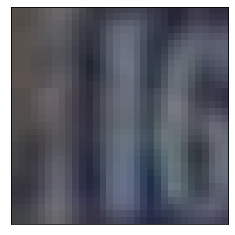

image label is [1]


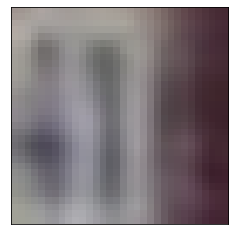

image label is [1]


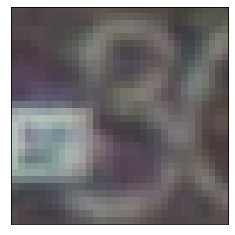

image label is [3]


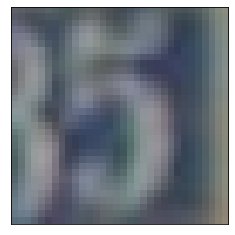

image label is [5]


In [220]:
# Plotting 10 random examples from the training set

indx = np.random.choice(x_train.shape[-1],10)

for i in range(10):
    plt.imshow(x_train[:,:,:,indx[i]])
    plt.xticks([])
    plt.yticks([])
    plt.show()
    print(f'image label is {y_train[indx[i]]}')


In [221]:
# Taking the mean of the color dimension to convert it to grayscale

x_train = np.mean(x_train, axis=2)
x_test = np.mean(x_test, axis=2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(32, 32, 73257)
(73257, 1)
(32, 32, 26032)
(26032, 1)


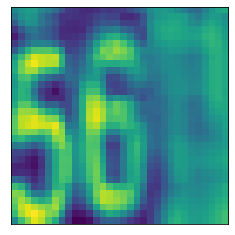

image label is [6]


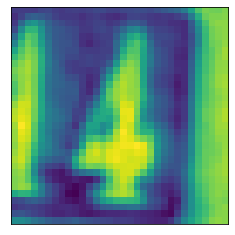

image label is [4]


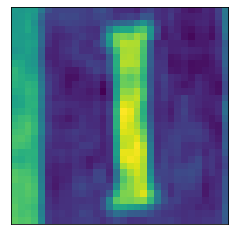

image label is [1]


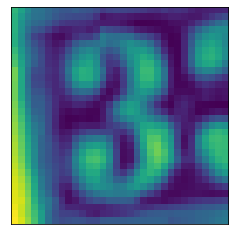

image label is [3]


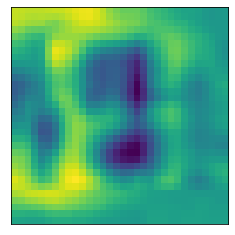

image label is [2]


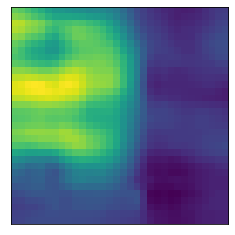

image label is [3]


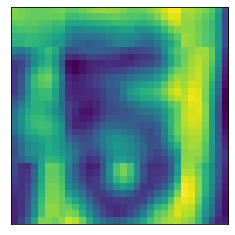

image label is [5]


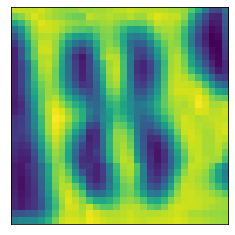

image label is [8]


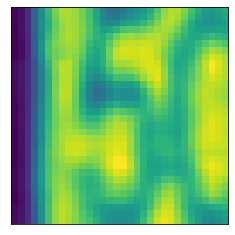

image label is [5]


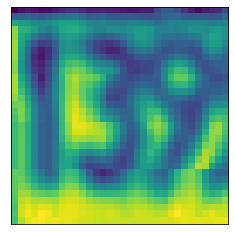

image label is [3]


In [222]:
# Plotting 10 random examples for the gray scale images

indx = np.random.choice(x_train.shape[-1],10)

for i in range(10):
    plt.imshow(x_train[:,:,indx[i]])
    plt.xticks([])
    plt.yticks([])
    plt.show()
    print(f'image label is {y_train[indx[i]]}')

In [223]:
# One hot encoding the labels

y_train = OneHotEncoder().fit_transform(y_train).toarray()
y_test = OneHotEncoder().fit_transform(y_test).toarray()

In [224]:
# Printing the new shape of the one hot encoded labels

print(y_train.shape)
print(y_test.shape)

(73257, 10)
(26032, 10)


In [225]:
# Transposing the train and test images so that it can be feed into the mlp

x_train = x_train.T
x_test = x_test.T

print(x_train.shape)
print(x_test.shape)

(73257, 32, 32)
(26032, 32, 32)


In [226]:
# Flatting the train and test images to a single dimension

x_train = np.reshape(x_train, (x_train.shape[0], 32*32))
x_test = np.reshape(x_test, (x_test.shape[0], 32*32))

print(x_train.shape)
print(x_test.shape)

(73257, 1024)
(26032, 1024)


## 2. MLP neural network classifier
* Build an MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different MLP architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 4 or 5 layers._
* Print out the model summary (using the summary() method)
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run. 
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [227]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout

In [228]:
# Defining the MPL model

def mlp():

    model = Sequential([Dense(units=1024, activation='relu', input_shape=(32*32,)),
        Dense(units=1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        Dense(units=1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        Dense(units=1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        Dense(units=1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        Dense(units=10, activation='softmax')
    ])

    print(model.summary())
    return model

model_mlp = mlp()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_92 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_93 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_94 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_95 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_96 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_97 (Dense)             (None, 10)                10250     
Total params: 5,258,250
Trainable params: 5,258,250
Non-trainable params: 0
___________________________________________

In [229]:
# Compiling the mlp model

model_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [230]:
# Defining the callbacks

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint(filepath='/content/gdrive/My Drive/Colab Notebooks/Getting Started with Tensorflow 2/checkpoint_1/model_mlp_{epoch:02d}',
                             save_weights_only=True,
                             save_best_only=True,
                             monitor = 'val_accuracy')

earlyStopping = EarlyStopping(patience=5, monitor='val_accuracy')

In [231]:
# Fitting the mlp model

history = model_mlp.fit(x=x_train,
          y=y_train,
          epochs=30,
          batch_size=64,
          validation_data=(x_test, y_test),
          callbacks=[checkpoint, earlyStopping])

Epoch 1/30
1145/1145 [==============================] - 11s 9ms/step - loss: 5.7567 - accuracy: 0.4291 - val_loss: 3.2402 - val_accuracy: 0.5501
Epoch 2/30
1145/1145 [==============================] - 11s 10ms/step - loss: 2.7675 - accuracy: 0.6192 - val_loss: 2.5019 - val_accuracy: 0.6444
Epoch 3/30
1145/1145 [==============================] - 11s 9ms/step - loss: 2.2286 - accuracy: 0.6607 - val_loss: 2.1367 - val_accuracy: 0.6388
Epoch 4/30
1145/1145 [==============================] - 11s 9ms/step - loss: 1.8062 - accuracy: 0.6913 - val_loss: 1.6400 - val_accuracy: 0.7081
Epoch 5/30
1145/1145 [==============================] - 10s 9ms/step - loss: 1.5190 - accuracy: 0.6990 - val_loss: 1.5262 - val_accuracy: 0.6720
Epoch 6/30
1145/1145 [==============================] - 10s 9ms/step - loss: 1.2738 - accuracy: 0.7130 - val_loss: 1.3969 - val_accuracy: 0.6563
Epoch 7/30
1145/1145 [==============================] - 10s 9ms/step - loss: 1.1149 - accuracy: 0.7208 - val_loss: 1.2168 - val_a

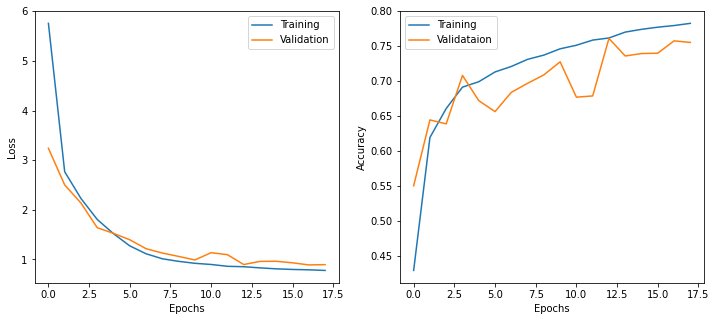

In [232]:
# Plotting the loss and accuracy

fig = plt.figure(figsize=(12,5))

fig.add_subplot(121)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

fig.add_subplot(122)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validataion')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();

In [233]:
# Priniting the loss and accuracy

loss, accuracy = model_mlp.evaluate(x_test, y_test)
print(f'loss is {loss:.2f}, accuracy is {accuracy:.2f}')

814/814 [==============================] - 3s 4ms/step - loss: 0.8961 - accuracy: 0.7553
loss is 0.90, accuracy is 0.76


## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different CNN architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 2 or 3 convolutional layers and 2 fully connected layers.)_
* The CNN model should use fewer trainable parameters than your MLP model.
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* You should aim to beat the MLP model performance with fewer parameters!
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [234]:
# Importing the data and printing the shape

x_train = train['X']
y_train = train['y']

x_test = test['X']
y_test = test['y']

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(32, 32, 3, 73257)
(73257, 1)
(32, 32, 3, 26032)
(26032, 1)


In [235]:
# Taking the mean along the rgb axis to covert the images to grayscale

x_train = np.mean(x_train, axis=2)
x_test = np.mean(x_test, axis=2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(32, 32, 73257)
(73257, 1)
(32, 32, 26032)
(26032, 1)


In [236]:
# One Hot encoding the labels

y_train = OneHotEncoder().fit_transform(y_train).toarray()
y_test = OneHotEncoder().fit_transform(y_test).toarray()

In [237]:
# Printing the label shape

print(y_train.shape)
print(y_test.shape)

(73257, 10)
(26032, 10)


In [238]:
# Taking the transpose so as to feed it to the cnn

x_train = x_train.T
x_test = x_test.T

print(x_train.shape)
print(x_test.shape)

(73257, 32, 32)
(26032, 32, 32)


In [239]:
# Adding a new axis so as to be compatible with the cnn input

x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

print(x_train.shape)
print(x_test.shape)

(73257, 32, 32, 1)
(26032, 32, 32, 1)


In [240]:
# Defining the cnn model

def cnn():
    model = Sequential([
        Conv2D(filters=32, kernel_size=(3,3), padding='SAME', activation='relu', input_shape=(32,32,1)),
        Dropout(0.5),
        MaxPooling2D(pool_size=(3,3)),
        Conv2D(filters=16, kernel_size=(3,3), padding='SAME', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(3,3)),
        Flatten(),
        Dense(units=128, activation='relu'),
        Dense(units=10, activation='softmax')
    ])

    print(model.summary())
    return model

model_cnn = cnn()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 10, 10, 16)        4624      
_________________________________________________________________
batch_normalization_4 (Batch (None, 10, 10, 16)        64        
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 144)             

In [241]:
# Compiling the cnn model

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [242]:
# Defining the callbacks

checkpoint = ModelCheckpoint(filepath='/content/gdrive/My Drive/Colab Notebooks/Getting Started with Tensorflow 2/checkpoint_2/model_cnn_{epoch:02d}',
                             save_weights_only=True,
                             save_best_only=True,
                             monitor = 'val_accuracy')

earlyStopping = EarlyStopping(monitor='val_accuracy', patience=5)

In [243]:
# Fitting the model

history = model_cnn.fit(x=x_train,
                        y=y_train,
                        epochs=30,
                        batch_size=64,
                        validation_data=(x_test, y_test),
                        callbacks=[checkpoint, earlyStopping])

Epoch 1/30
1145/1145 [==============================] - 10s 9ms/step - loss: 1.0823 - accuracy: 0.6513 - val_loss: 0.8567 - val_accuracy: 0.7375
Epoch 2/30
1145/1145 [==============================] - 9s 8ms/step - loss: 0.6588 - accuracy: 0.7947 - val_loss: 0.6825 - val_accuracy: 0.7946
Epoch 3/30
1145/1145 [==============================] - 9s 8ms/step - loss: 0.5716 - accuracy: 0.8240 - val_loss: 0.6362 - val_accuracy: 0.8038
Epoch 4/30
1145/1145 [==============================] - 9s 8ms/step - loss: 0.5254 - accuracy: 0.8387 - val_loss: 0.5941 - val_accuracy: 0.8168
Epoch 5/30
1145/1145 [==============================] - 9s 8ms/step - loss: 0.4954 - accuracy: 0.8460 - val_loss: 0.5665 - val_accuracy: 0.8278
Epoch 6/30
1145/1145 [==============================] - 9s 8ms/step - loss: 0.4725 - accuracy: 0.8538 - val_loss: 0.5735 - val_accuracy: 0.8263
Epoch 7/30
1145/1145 [==============================] - 9s 8ms/step - loss: 0.4549 - accuracy: 0.8586 - val_loss: 0.6038 - val_accuracy

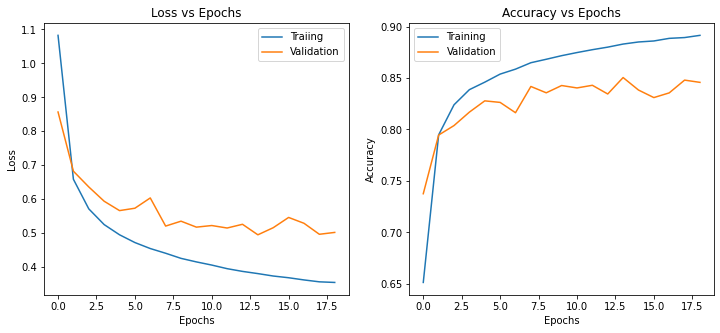

In [244]:
# Plotting the loss and accuracy

fig = plt.figure(figsize=(12,5))

fig.add_subplot(121)
plt.plot(history.history['loss'], label='Traiing')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend();

fig.add_subplot(122)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend();

In [245]:
# Printing the loss and accuracy

loss, accuracy = model_cnn.evaluate(x_test, y_test)
print(f'loss is {loss:.2f}, accuracy is {accuracy:.2f}')

814/814 [==============================] - 3s 3ms/step - loss: 0.5023 - accuracy: 0.8458
loss is 0.50, accuracy is 0.85


## 4. Get model predictions
* Load the best weights for the MLP and CNN models that you saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

In [246]:
# Loading the weights for the mlp model

model_mlp = mlp()
model_mlp.load_weights(tf.train.latest_checkpoint('/content/gdrive/My Drive/Colab Notebooks/Getting Started with Tensorflow 2/checkpoint_1'))

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_101 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_102 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_103 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_104 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_105 (Dense)            (None, 10)                10250     
Total params: 5,258,250
Trainable params: 5,258,250
Non-trainable params: 0
___________________________________________

In [247]:
# Loading the weights for the cnn model

model_cnn = cnn()
model_cnn.load_weights(tf.train.latest_checkpoint('/content/gdrive/My Drive/Colab Notebooks/Getting Started with Tensorflow 2/checkpoint_2'))

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 10, 10, 16)        4624      
_________________________________________________________________
batch_normalization_5 (Batch (None, 10, 10, 16)        64        
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 144)             

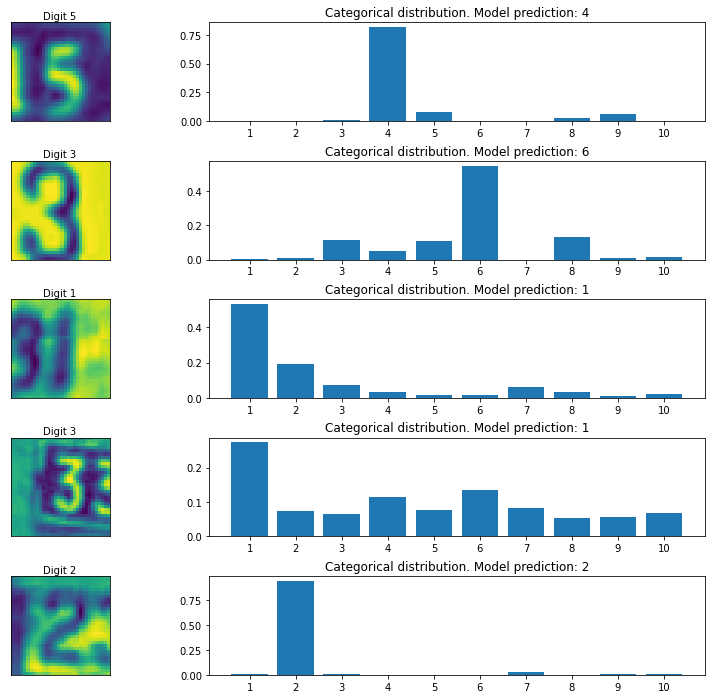

In [248]:
# Plotting the actual vs predicted graph for the mlp model

x_test = test['X']
y_test = test['y']

x_test = np.mean(x_test, axis=2)
x_test = x_test.T
x_test = np.reshape(x_test, (x_test.shape[0], 32*32))
y_test = OneHotEncoder().fit_transform(y_test).toarray()

random_inx = np.random.choice(x_test.shape[0],5)
random_test_images = x_test[random_inx]
random_test_labels = y_test[random_inx]

predictions_mlp = model_mlp.predict(random_test_images)

fig, axes = plt.subplots(5, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)


for i, (prediction, inx, label) in enumerate(zip(predictions_mlp, random_inx, random_test_labels)):
    axes[i, 0].imshow(np.mean(test['X'], axis=2)[:, :, inx])
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {np.argmax(label)+1}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_xticklabels([1,2,3,4,5,6,7,8,9,10])
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)+1}")
    
plt.show()


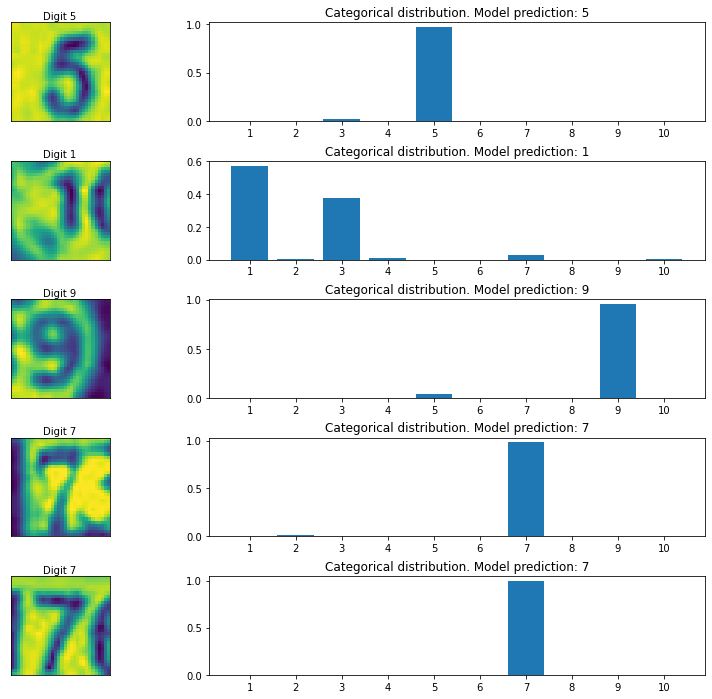

In [249]:
# Plotting the actual vs predicted graph for the cnn model


x_test = test['X']
y_test = test['y']

x_test = np.mean(x_test, axis=2)
x_test = x_test.T
x_test = x_test[..., np.newaxis]

y_test = OneHotEncoder().fit_transform(y_test).toarray()

random_inx = np.random.choice(x_test.shape[0],5)
random_test_images = x_test[random_inx]
random_test_labels = y_test[random_inx]

predictions_cnn = model_cnn.predict(random_test_images)

fig, axes = plt.subplots(5, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)


for i, (prediction, inx, label) in enumerate(zip(predictions_cnn, random_inx, random_test_labels)):
    axes[i, 0].imshow(np.mean(test['X'], axis=2)[:, :, inx])
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {np.argmax(label)+1}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_xticklabels([1,2,3,4,5,6,7,8,9,10])
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)+1}")
    
plt.show()